# About Dataset

**Age :** the age of the person

**Occupation :** the occupation of the person

**Annual_Income :** the annual income of the person

**Num_Bank_Accounts :** the number of bank accounts a person holds

**Num_Credit_Card :** the number of other credit cards held by a person

**Interest_Rate :** the interest rate on credit card

**Num_of_Loan :** the number of loans taken from the bank

**Delay_from_due_date :** the average number of days delayed from the payment date

**Num_of_Delayed_Payment :** the average number of payments delayed by a person

**Changed_Credit_Limit :** the percentage change in credit card limit

**Num_Credit_Inquiries :** the number of credit card inquiries

**Outstanding_Debt :** the remaining debt to be paid (in USD)

**Credit_Utilization_Ratio :** the utilization ratio of credit card

**Credit_History_Age :** the age of credit history of the person

**Payment_of_Min_Amount :** whether only the minimum amount was paid by the person

**Total_EMI_per_month :** the monthly EMI payments (in USD)

**Amount_invested_monthly :** the monthly amount invested by the customer (in USD)

**Monthly_Balance :** the monthly balance amount of the customer (in USD)

**Credit_Score :** the bracket of credit score (Poor, Standard, Good)

# Import Libraries

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

import plotly.io as pio
pio.renderers.default = "notebook"

#To display the plots
# %matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
train = pd.read_csv("credit_score_without_dummy.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98288 entries, 0 to 98287
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       98288 non-null  int64  
 1   Occupation                98288 non-null  object 
 2   Annual_Income             98288 non-null  float64
 3   Num_Bank_Accounts         98288 non-null  float64
 4   Num_Credit_Card           98288 non-null  float64
 5   Interest_Rate             98288 non-null  float64
 6   Num_of_Loan               98288 non-null  float64
 7   Delay_from_due_date       98288 non-null  int64  
 8   Num_of_Delayed_Payment    98288 non-null  float64
 9   Changed_Credit_Limit      98288 non-null  float64
 10  Num_Credit_Inquiries      98288 non-null  float64
 11  Outstanding_Debt          98288 non-null  float64
 12  Credit_Utilization_Ratio  98288 non-null  float64
 13  Credit_History_Age        98288 non-null  int64  
 14  Paymen

In [7]:
#test = pd.read_csv("test_without_dummy.csv")

In [8]:
#test.info()

In [ ]:
train1 = train[['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Credit_Score']]
sns.pairplot(train1, hue="Credit_Score")
plt.show()

In [ ]:
train2 = train[['Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score']]
sns.pairplot(train2, hue="Credit_Score")
plt.show()

In [4]:
train.Credit_Score.value_counts()

Standard    52509
Poor        28723
Good        17056
Name: Credit_Score, dtype: int64

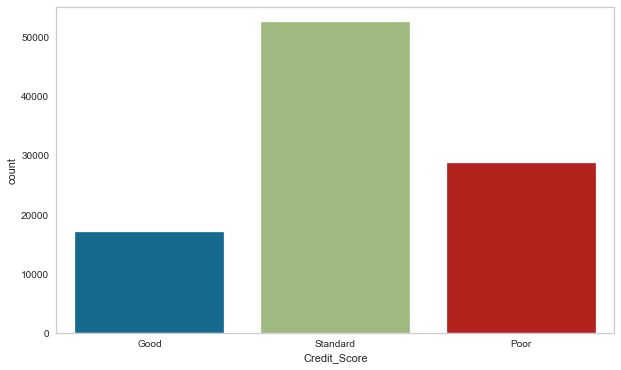

In [5]:
sns.countplot(train["Credit_Score"])
plt.show()

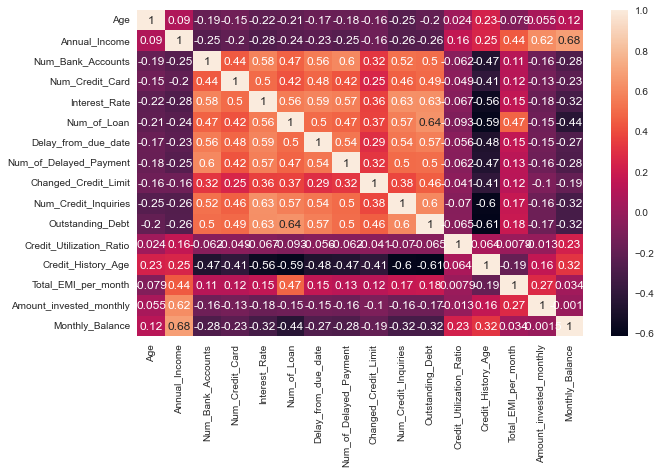

In [13]:
sns.heatmap(train.corr(),annot=True)
plt.show()

# Data Preprocessing

In [6]:
X = train.drop("Credit_Score",axis=1)
y = train.Credit_Score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

## Lazypredict

https://towardsdatascience.com/lazy-predict-fit-and-evaluate-all-the-models-from-scikit-learn-with-a-single-line-of-code-7fe510c7281

Lazypredict library automatically applies preprocessing to the dataset. First, it imputes missing values using SimpleImputer (using the mean for numeric features and a constant ‘missing’ value for categorical ones). Then, it uses StandardScaler for numeric features and either OneHotEncoder or OrdinalEncoder for the categorical features (depending on the cardinality — number of unique values).

In [29]:
import pyforest

In [30]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [31]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [12:41<00:00, 26.24s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.81,0.81,None,0.81,9.56
RandomForestClassifier,0.81,0.80,None,0.81,19.28
BaggingClassifier,0.80,0.80,None,0.80,8.06
KNeighborsClassifier,0.77,0.76,None,0.77,28.03
DecisionTreeClassifier,0.74,0.73,None,0.74,1.56
ExtraTreeClassifier,0.74,0.72,None,0.74,0.36
LGBMClassifier,0.73,0.70,None,0.73,2.95
GaussianNB,0.59,0.67,None,0.58,0.36
BernoulliNB,0.59,0.67,None,0.59,0.42


In [9]:
# grab categorical columns' names for further analysis

cat = X.select_dtypes("object").columns
cat

Index(['Occupation', 'Payment_of_Min_Amount'], dtype='object')

In [10]:
# define column transformer object to apply onehotencoding and scaling on data

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())  # apply onehot encoding on categorical features, then apply minmax scaler on remaining features

# Implement Machine Leraning Models

In [8]:
# define a function to compare evaluation metrics of models

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test);

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train)
    plt.show()

## Logistic Model

In [19]:
# built a pipe model for Logistic Regression

operations = [("OneHotEncoder", column_trans), ("log_model", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=42))]

log_pipe_model = Pipeline(steps=operations)

In [20]:
# fit the logistic regression model on train data

log_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Occupation', 'Payment_of_Min_Amount'], dtype='object'))])),
                ('log_model',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

        Good       0.41      0.82      0.55      3411
        Poor       0.62      0.69      0.65      5745
    Standard       0.79      0.49      0.60     10502

    accuracy                           0.60     19658
   macro avg       0.61      0.67      0.60     19658
weighted avg       0.67      0.60      0.61     19658




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

        Good       0.42      0.83      0.55     13645
        Poor       0.62      0.69      0.65     22978
    Standard       0.79      0.49      0.60     42007

    accuracy                           0.61     78630
   macro avg       0.61      0.67      0.60     78630
weighted avg       0.68      0.61      0.61     78630



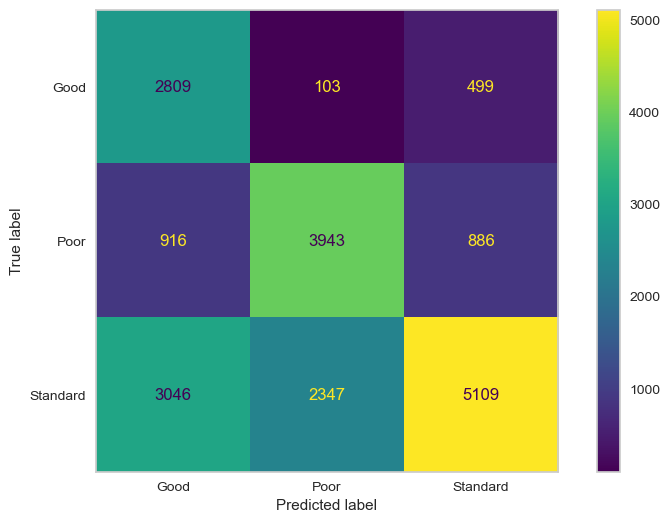

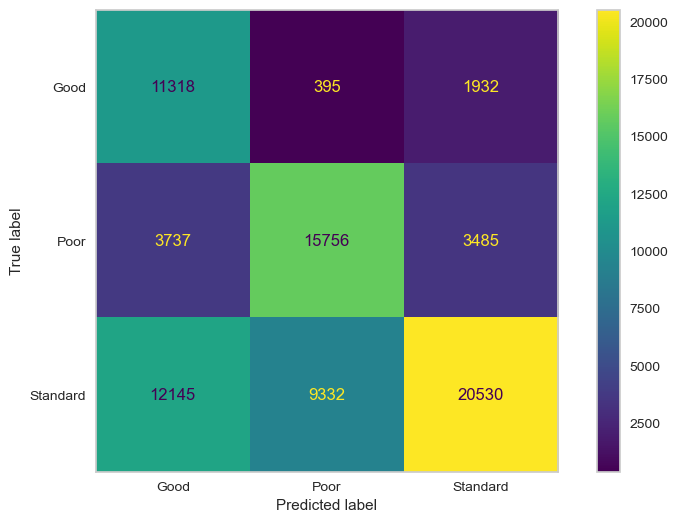

In [38]:
# check the evaluation metrics of logistic model

eval_metric(log_pipe_model, X_train, y_train, X_test, y_test)

 ## Define Scoring to determine Poor Credit Score correctly

In [11]:
scoring = {"f1_Poor" : make_scorer(f1_score, average = None, labels =["Poor"]),
           "precision_Poor" : make_scorer(precision_score, average = None, labels =["Poor"]),
           "recall_Poor" : make_scorer(recall_score, average = None, labels =["Poor"])}

### Logistic Model Cross Validation

In [40]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Poor          0.65
test_precision_Poor   0.62
test_recall_Poor      0.68
dtype: float64

###  Logistic Model GridsearchCV

In [12]:
# Defining gridsearch scoring parameter to maximize recall values of Poor Credit Score

recall_Poor =  make_scorer(recall_score, average=None, labels=["Poor"])

In [45]:
# reset the pipe model
model = Pipeline(operations)

# defining the grid parameter
penalty = ["l1", "l2"]
C = np.logspace(-1, 2, 4)
solver = ['liblinear', 'lbfgs']

param_grid = {"log_model__penalty" : penalty,
             "log_model__C" : C,
             "log_model__solver" : solver}

# built Logistic grid model
log_grid_model = GridSearchCV(model, param_grid = param_grid, scoring=recall_Poor, cv=5, n_jobs=-1)

In [46]:
# fit grid model on train data

log_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Occupation', 'Payment_of_Min_Amount'], dtype='object'))])),
                                       ('log_model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log_model__C': array([  0.1,   1. ,  10. , 100. ]),
 

In [47]:
log_grid_model.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Occupation', 'Payment_of_Min_Amount'], dtype='object'))])),
                ('log_model',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=10000, random_state=42))])

In [48]:
log_grid_model.best_params_

{'log_model__C': 0.1, 'log_model__penalty': 'l2', 'log_model__solver': 'lbfgs'}

In [49]:
log_grid_model.best_score_

0.6863088781369238

TEST REPORT
              precision    recall  f1-score   support

        Good       0.41      0.83      0.55      3411
        Poor       0.62      0.69      0.65      5745
    Standard       0.79      0.48      0.60     10502

    accuracy                           0.60     19658
   macro avg       0.61      0.67      0.60     19658
weighted avg       0.67      0.60      0.61     19658




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

        Good       0.41      0.83      0.55     13645
        Poor       0.62      0.69      0.65     22978
    Standard       0.79      0.49      0.60     42007

    accuracy                           0.60     78630
   macro avg       0.61      0.67      0.60     78630
weighted avg       0.68      0.60      0.61     78630



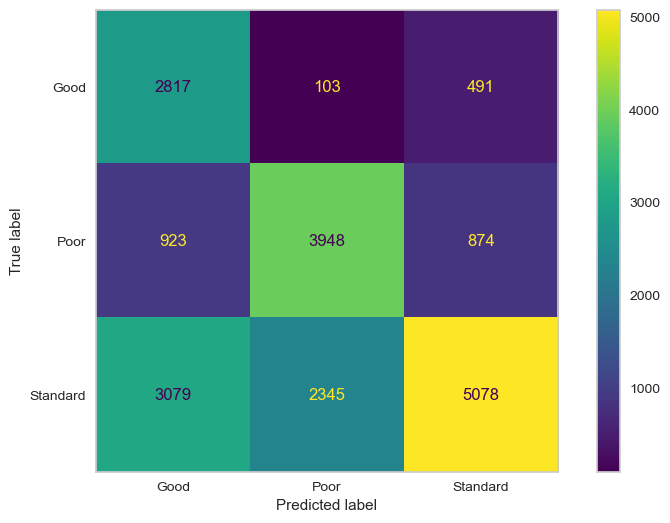

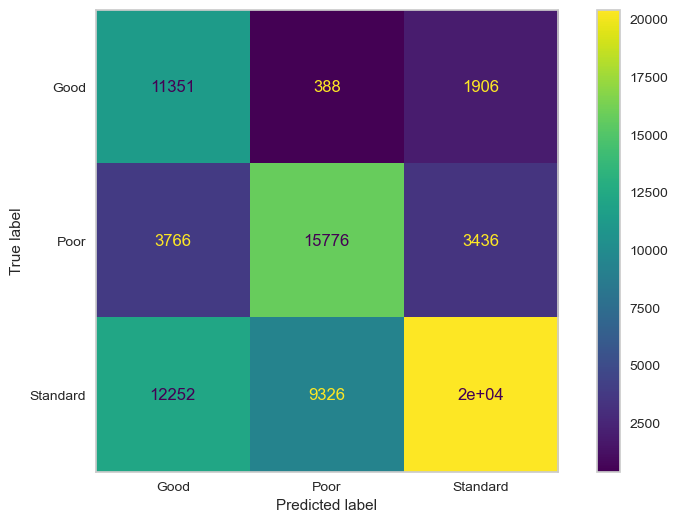

In [50]:
# checking the evaluation metrics of grid model

eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

### Evaluating Precision-Recall Curves

In [ ]:
# precision-recall curve for Logistic grid model

from yellowbrick.classifier import PrecisionRecallCurve

model = log_grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes=["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## Decision Tree Classifier Model

In [197]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder   #*

In [198]:
cat = X.select_dtypes("object").columns
cat

Index(['Occupation', 'Payment_of_Min_Amount'], dtype='object')

In [199]:
#cat = X.select_dtypes("object").columns.columns.to_list() 
#cat

In [200]:
column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat), 
    remainder='passthrough'
)   #*

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [230]:
column_trans.get_feature_names_out()

array(['ordinalencoder__Occupation',
       'ordinalencoder__Payment_of_Min_Amount', 'remainder__Age',
       'remainder__Annual_Income', 'remainder__Num_Bank_Accounts',
       'remainder__Num_Credit_Card', 'remainder__Interest_Rate',
       'remainder__Num_of_Loan', 'remainder__Delay_from_due_date',
       'remainder__Num_of_Delayed_Payment',
       'remainder__Changed_Credit_Limit',
       'remainder__Num_Credit_Inquiries',
       'remainder__Credit_Utilization_Ratio',
       'remainder__Credit_History_Age', 'remainder__Total_EMI_per_month',
       'remainder__Amount_invested_monthly', 'remainder__Monthly_Balance'],
      dtype=object)

## Vanilla DT Model

In [202]:
dt_model = DecisionTreeClassifier(random_state=101,class_weight='balanced')
operations = [("OrdinalEncoder", column_trans), ("dt", dt_model)]

pipe_dt = Pipeline(steps=operations)
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Occupation', 'Payment_of_Min_Amount'], dtype='object'))])),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

        Good       0.69      0.68      0.68      3411
        Poor       0.74      0.71      0.73      5745
    Standard       0.76      0.78      0.77     10502

    accuracy                           0.74     19658
   macro avg       0.73      0.72      0.73     19658
weighted avg       0.74      0.74      0.74     19658




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     13645
        Poor       1.00      1.00      1.00     22978
    Standard       1.00      1.00      1.00     42007

    accuracy                           1.00     78630
   macro avg       1.00      1.00      1.00     78630
weighted avg       1.00      1.00      1.00     78630



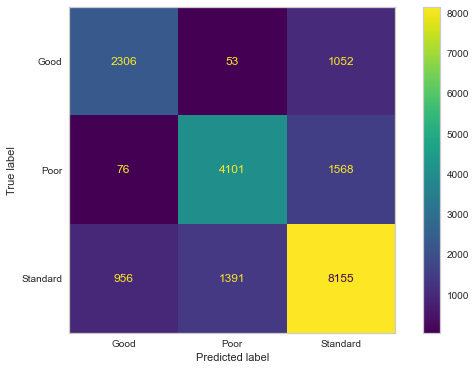

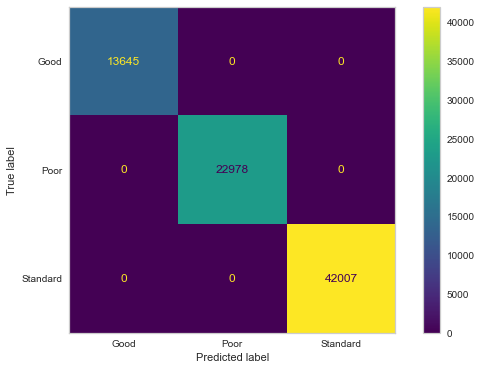

In [203]:
eval_metric(pipe_dt, X_train, y_train, X_test, y_test)          #*

### DT Model Cross Validation 

In [204]:
scoring

{'f1_Poor': make_scorer(f1_score, average=None, labels=['Poor']),
 'precision_Poor': make_scorer(precision_score, average=None, labels=['Poor']),
 'recall_Poor': make_scorer(recall_score, average=None, labels=['Poor'])}

In [205]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Poor          0.72
test_precision_Poor   0.73
test_recall_Poor      0.72
dtype: float64

## Feature importance

In [206]:
pipe_dt["dt"].feature_importances_                                #*

array([0.02893208, 0.17230334, 0.03871479, 0.04938766, 0.02279627,
       0.0257719 , 0.07323584, 0.01365033, 0.05195049, 0.03640391,
       0.04582871, 0.02433643, 0.15466193, 0.04727602, 0.08663016,
       0.03651134, 0.04570951, 0.04589928])

In [207]:
pipe_dt["dt"].feature_importances_.sum()  

1.0000000000000002

In [208]:
X_train.head(1)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
78626,51,Writer,93589.48,6.00,7.00,16.00,3.00,24,17.00,9.92,1.00,425.51,33.92,367,No,200.71,447.45,340.36


In [209]:
X_train["Payment_of_Min_Amount"].value_counts()

Yes    47530
No     31100
Name: Payment_of_Min_Amount, dtype: int64

In [210]:
X_train["Occupation"].value_counts()

Lawyer           5557
Engineer         5421
Architect        5360
Scientist        5309
Mechanic         5300
Media_Manager    5287
Accountant       5278
Developer        5258
Entrepreneur     5236
Teacher          5223
Journalist       5182
Doctor           5168
Manager          5048
Writer           5020
Musician         4983
Name: Occupation, dtype: int64

In [211]:
pd.DataFrame(pipe_dt["OrdinalEncoder"].fit_transform(X_train)).head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,14.00,0.00,51.00,93589.48,6.00,7.00,16.00,3.00,24.00,17.00,9.92,1.00,425.51,33.92,367.00,200.71,447.45,340.36
1,10.00,1.00,26.00,75612.08,8.00,7.00,17.00,5.00,52.00,18.00,8.50,10.00,2312.82,30.01,214.00,226.10,73.48,580.52
2,4.00,1.00,54.00,114588.40,5.00,7.00,20.00,0.00,21.00,17.00,14.21,5.00,941.85,34.30,397.00,0.00,1008.21,215.59
3,1.00,1.00,46.00,62799.48,9.00,8.00,32.00,9.00,54.00,18.00,20.07,9.00,4144.96,41.90,38.00,271.36,287.86,433.53


In [212]:
list(X_train.select_dtypes("object").columns)

['Occupation', 'Payment_of_Min_Amount']

In [213]:
list(X_train.select_dtypes("number").columns)

['Age',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [214]:
features = list(X_train.select_dtypes("object").columns) + list(X_train.select_dtypes("number").columns)
features

['Occupation',
 'Payment_of_Min_Amount',
 'Age',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

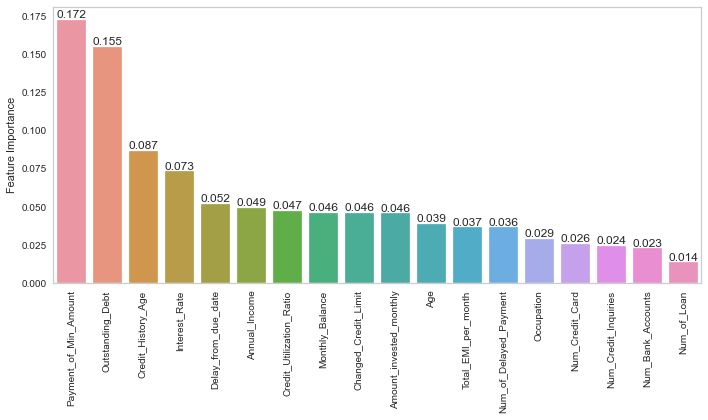

In [215]:
df_f_i = pd.DataFrame(data = pipe_dt["dt"].feature_importances_, index=features, #index=X.columns
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)




ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.tight_layout()

In [216]:
X2 = X.drop(columns = ["Outstanding_Debt"])

In [217]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101)

In [218]:
operations2 = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

pipe_model2 = Pipeline(steps=operations2)

pipe_model2.fit(X_train2, y_train2)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Occupation', 'Payment_of_Min_Amount'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

        Good       0.66      0.66      0.66      3419
        Poor       0.73      0.72      0.72      5729
    Standard       0.75      0.76      0.76     10510

    accuracy                           0.73     19658
   macro avg       0.71      0.71      0.71     19658
weighted avg       0.73      0.73      0.73     19658




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     13637
        Poor       1.00      1.00      1.00     22994
    Standard       1.00      1.00      1.00     41999

    accuracy                           1.00     78630
   macro avg       1.00      1.00      1.00     78630
weighted avg       1.00      1.00      1.00     78630



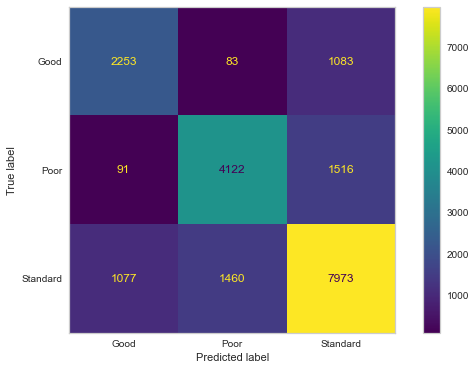

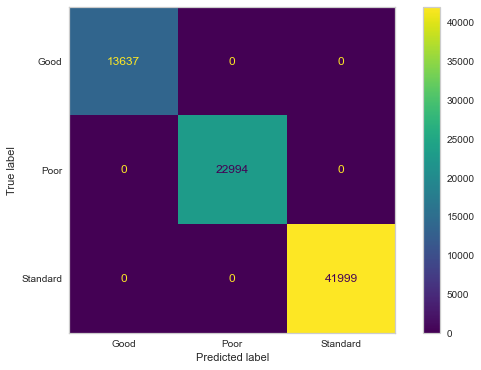

In [219]:
eval_metric(pipe_model2, X_train2, y_train2, X_test2, y_test2)

In [220]:
model = Pipeline(operations)
scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Poor          0.71
test_precision_Poor   0.72
test_recall_Poor      0.71
dtype: float64

## DT Model Gridsearch

In [221]:
recall_Poor =  make_scorer(recall_score, average=None, labels=["Poor"])

In [222]:
operations

[('OrdinalEncoder',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('ordinalencoder',
                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                  unknown_value=-1),
                                   Index(['Occupation', 'Payment_of_Min_Amount'], dtype='object'))])),
 ('dt', DecisionTreeClassifier(class_weight='balanced', random_state=101))]

In [223]:
model = Pipeline(steps=operations)

                                    
param_grid = {
    "dt__class_weight" : ["balanced"], 
    "dt__criterion" : ["gini", "entropy"], 
    "dt__splitter": ["best", "random"],  
    "dt__max_features":["auto", "log2"], 
    "dt__max_depth": [None, 1, 2,3,4,5,6],
    "dt__min_samples_split": [2, 3],
    "dt__min_samples_leaf": [1, 2, 3],
}


dt_grid_model = GridSearchCV(model, param_grid = param_grid, scoring=recall_Poor, cv=5, n_jobs=-1, error_score="raise")

In [224]:
%%time
dt_grid_model.fit(X_train, y_train)

Wall time: 5min 35s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Occupation', 'Payment_of_Min_Amount'], dtype='object'))])),
                                       ('dt',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'dt__class_weight': ['balanced'],
                         'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [None, 1, 2, 3, 4, 5, 6],
                         'dt__max_features': ['auto', 'log2'],
                         'dt__min_samples_leaf': [1, 2, 3],
                         'dt__min_samples_split': [2, 3],
                         'dt__splitter': ['best', 'random']},
             scoring=make_scorer(recall_score, average=None, labels=['Poor']))

In [225]:
dt_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Occupation', 'Payment_of_Min_Amount'], dtype='object'))])),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=2,
                                        max_features='auto', random_state=101,
                                        splitter='random'))])

In [226]:
dt_grid_model.best_params_

{'dt__class_weight': 'balanced',
 'dt__criterion': 'gini',
 'dt__max_depth': 2,
 'dt__max_features': 'auto',
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__splitter': 'random'}

In [227]:
dt_grid_model.best_score_

0.8211766962045817

TEST REPORT
              precision    recall  f1-score   support

        Good       0.38      0.86      0.53      3411
        Poor       0.40      0.83      0.53      5745
    Standard       0.00      0.00      0.00     10502

    accuracy                           0.39     19658
   macro avg       0.26      0.56      0.35     19658
weighted avg       0.18      0.39      0.25     19658




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

        Good       0.38      0.86      0.53     13645
        Poor       0.39      0.82      0.53     22978
    Standard       0.00      0.00      0.00     42007

    accuracy                           0.39     78630
   macro avg       0.26      0.56      0.35     78630
weighted avg       0.18      0.39      0.25     78630



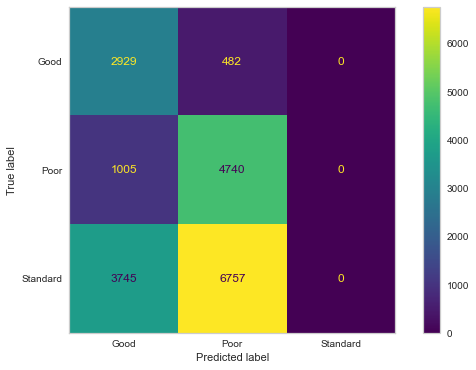

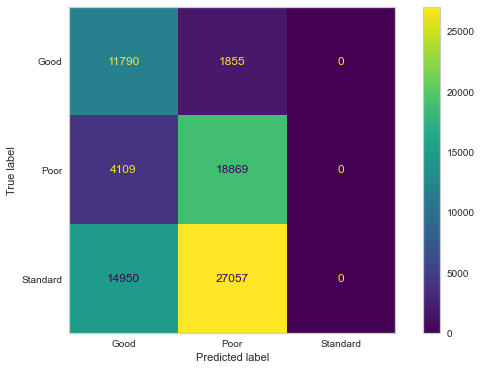

In [228]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)